In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
df=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")


In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.shape

(891, 12)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


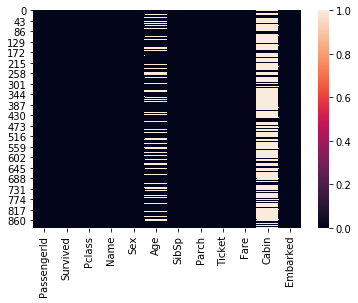

In [12]:
sns.heatmap(df.isnull())

In [13]:
def missing_data_percentage(column):
    percentage = (df[column].isna().sum()/len(df[column])) * 100
    print('{} column - missing data percentage: {:.2f} %' .format(column, percentage))

In [14]:
missing_data_percentage("Age")


Age column - missing data percentage: 19.87 %


In [15]:
missing_data_percentage("Cabin")

Cabin column - missing data percentage: 77.10 %


In [16]:
df.drop(columns=['Cabin'], axis=1, inplace=True)


In [17]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)

In [18]:
df.shape

(891, 11)

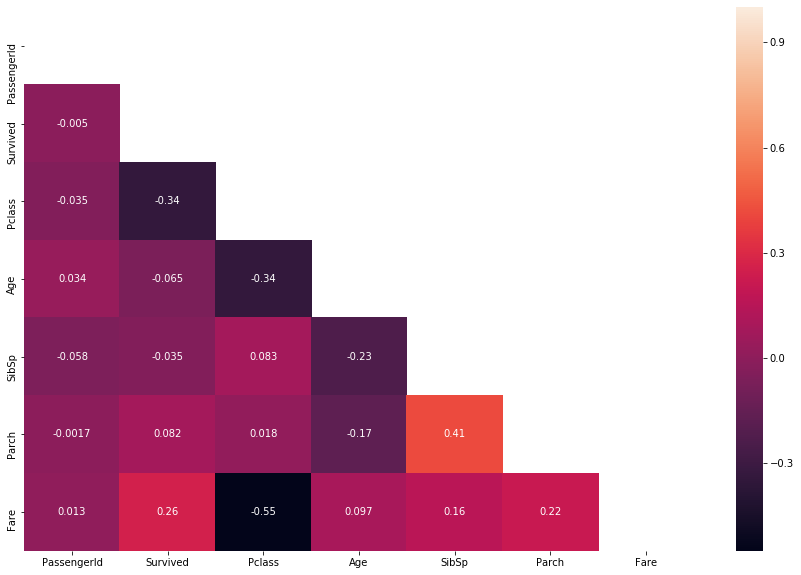

In [19]:
f = plt.figure(figsize=(15, 10))
correlation_matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, mask = correlation_matrix)

In [20]:
df.Age.nunique()

88

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [22]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Visual Summary with Seaborn

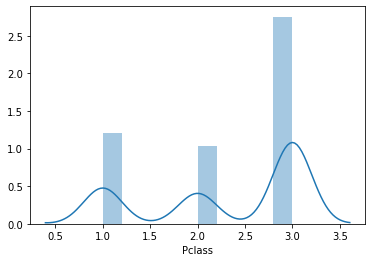

In [24]:
sns.distplot(df['Pclass'])

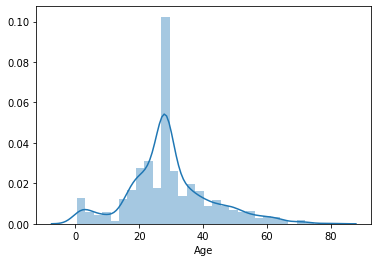

In [25]:
sns.distplot(df['Age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AEB597B278>,
      dtype=object)

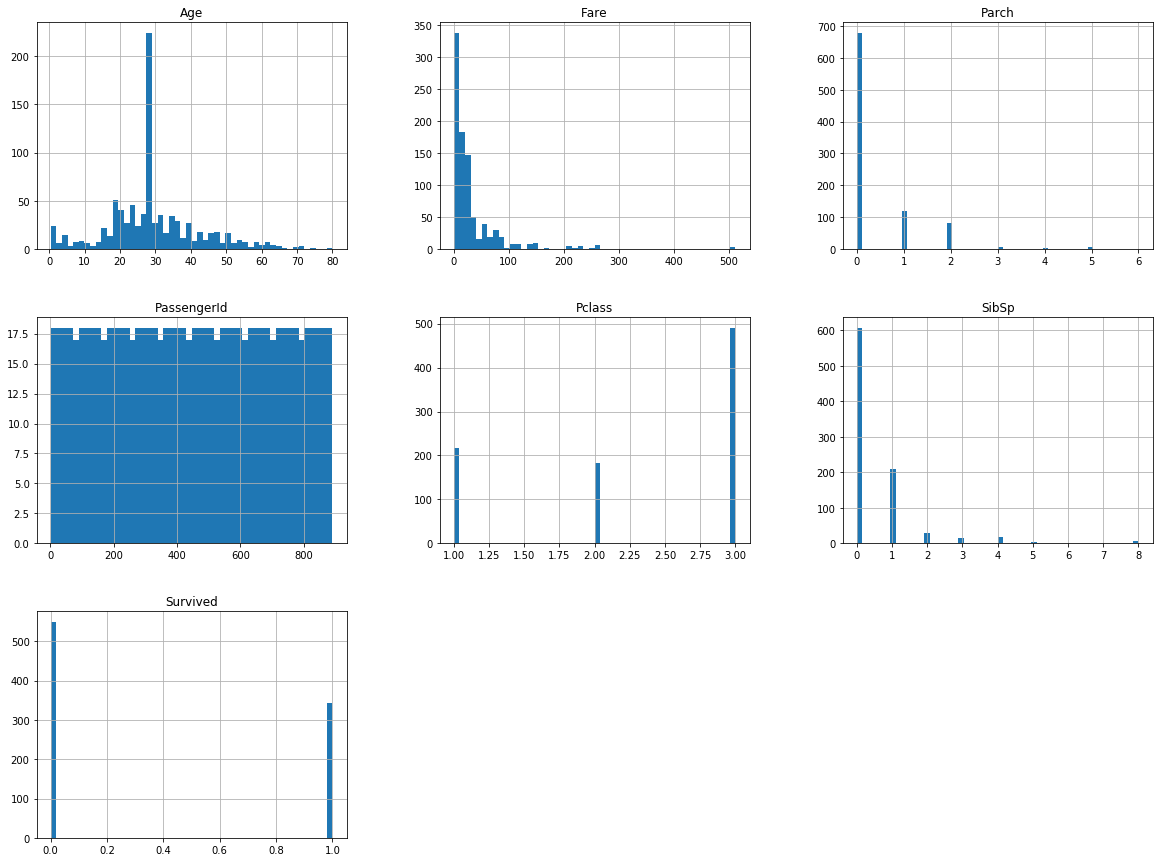

In [26]:
df.hist(bins=50,figsize=(20,15))

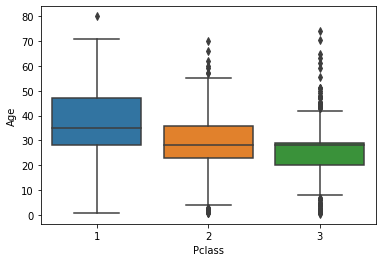

In [27]:
sns.boxplot(data=df, x='Pclass', y='Age')

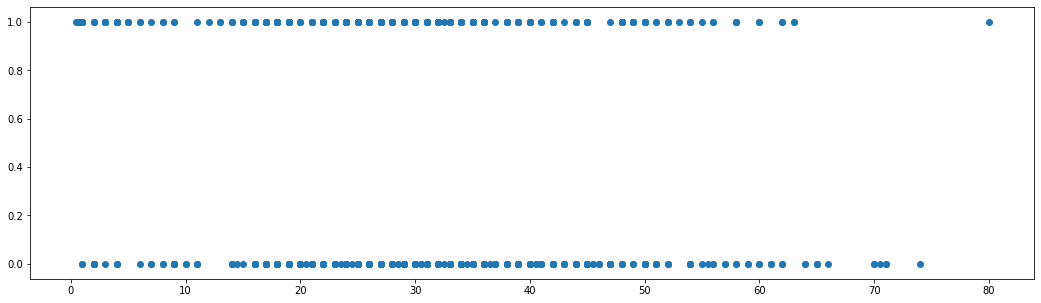

In [28]:
# Check the Survival of different Age groups..
plt.figure(figsize=[18,5])
plt.scatter(x="Age",y="Survived",data=df)

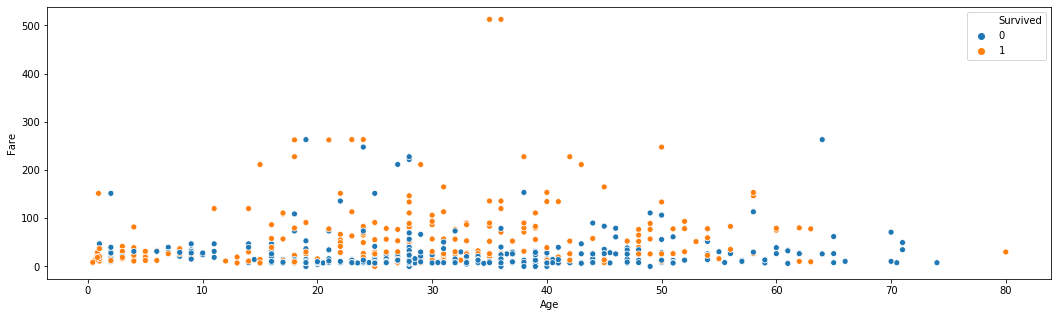

In [29]:
# Check the Survival of Fare..
plt.figure(figsize=[18,5])
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=df)

Text(0, 0.5, 'Survived')

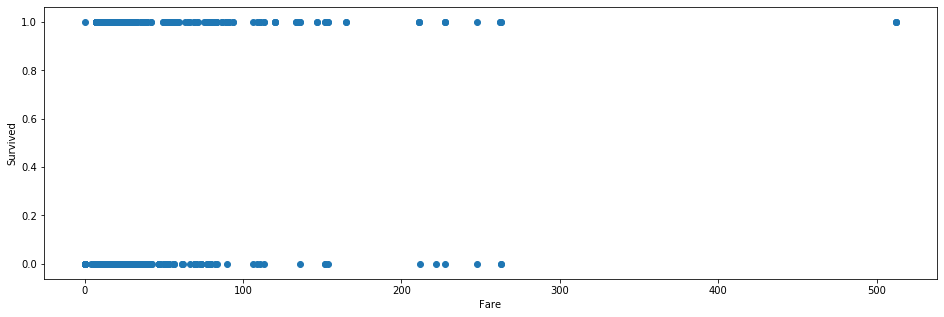

In [30]:
# Survival on basis of Fair..
plt.figure(figsize=[16,5])
plt.scatter(x="Fare",y="Survived",data=df)
plt.xlabel("Fare")
plt.ylabel("Survived")

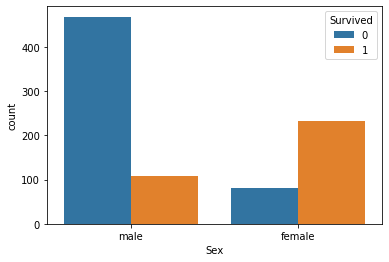

In [31]:
sns.countplot(x="Sex",hue="Survived",data=df)

# Categorical


In [32]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [33]:
df[(df['Survived']==1) & (df['Age']>40)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,C
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S


In [34]:
df[(df['Survived']==1) & (df['Age']>40)& (df['Sex']=='male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,S
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,S
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,S
414,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,S
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,S
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C
460,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,C
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,C


In [35]:
df[(df['Survived']==1) & (df['Age']>40)& (df['Sex']=='female')&(df['Parch']==1)&(df['SibSp']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S


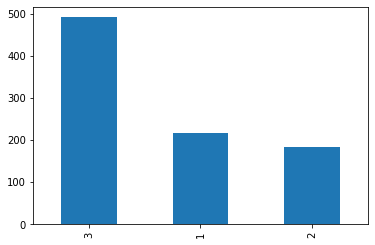

In [36]:
df.Pclass.value_counts().plot(kind='bar')

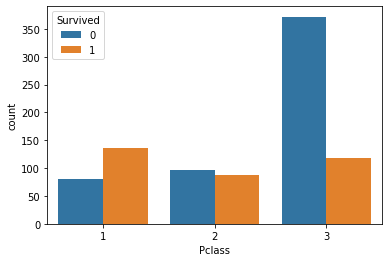

In [37]:
sns.countplot(x="Pclass", data=df, hue = 'Survived')

## Heat MAPS

In [38]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


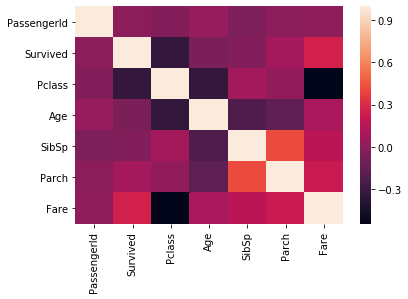

In [39]:
sns.heatmap(df.corr())

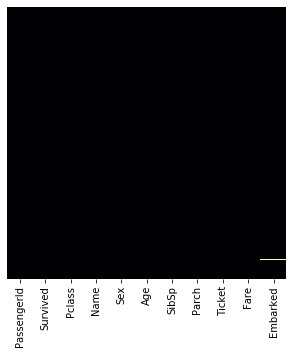

In [40]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [41]:
df.replace(('male', 'female'), (1, 0), inplace=True)
df_test.replace(('male', 'female'), (1, 0), inplace=True)

In [42]:
# Getting Features
features = ['Sex','Pclass','SibSp','Parch','Embarked']
x = pd.get_dummies(df[features])

# Predicting value
y = df['Survived']

# Splitting into TESTING and TRAINING DATA

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [44]:
test_x = df_test[features]

In [45]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

# Data Modelling

# 1. Logistic Regression:-

In [46]:
#import Library for Accuracy Score
from sklearn.metrics import accuracy_score

#import Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression Classifier
logisreg = LogisticRegression()

#Train the model using Training Dataset
logisreg.fit(x_train,y_train)

# Prediction using test data
y_pred = logisreg.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_logisreg = accuracy_score(y_test, y_pred)
print( 'Accuracy of Logistic Regression model : ', acc_logisreg )

Accuracy of Logistic Regression model :  0.7988826815642458


C:\Users\SHWETANK VERMA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 2. Random Forest Classifier

In [47]:
#Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest
rfc = RandomForestClassifier()

#Train the model using Training Dataset
rfc.fit(x_train,y_train)

# Prediction using test data
rfc_pred = rfc.predict(x_test)

# Calculate Model accuracy by comparing y_test and rfc_pred
acc_rf = accuracy_score(y_test, rfc_pred)
print( 'Accuracy of  Random Forest : ', acc_rf )

Accuracy of  Random Forest :  0.8044692737430168


C:\Users\SHWETANK VERMA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 3. Support Vector Machine

In [48]:
#Import Library for Support Vector Machine
from sklearn import svm

#Initialize the Support Vector Classifier
svmodel = svm.SVC()

#Train the model using Training Dataset
svmodel.fit(x_train,y_train)

# Prediction using test data
svm_pred = svmodel.predict(x_test)

# Calculate Model accuracy by comparing y_test and svm_pred
acc_svc = accuracy_score(y_test, svm_pred)
print( 'Accuracy of Support Vector Classifier: ', acc_svc )

Accuracy of Support Vector Classifier:  0.8044692737430168


# MODEL SELECTION

In [52]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'Support Vector Machines'],
    'Score': [acc_logisreg, acc_rf, acc_svc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.804469
2,Support Vector Machines,0.804469
0,Logistic Regression,0.798883


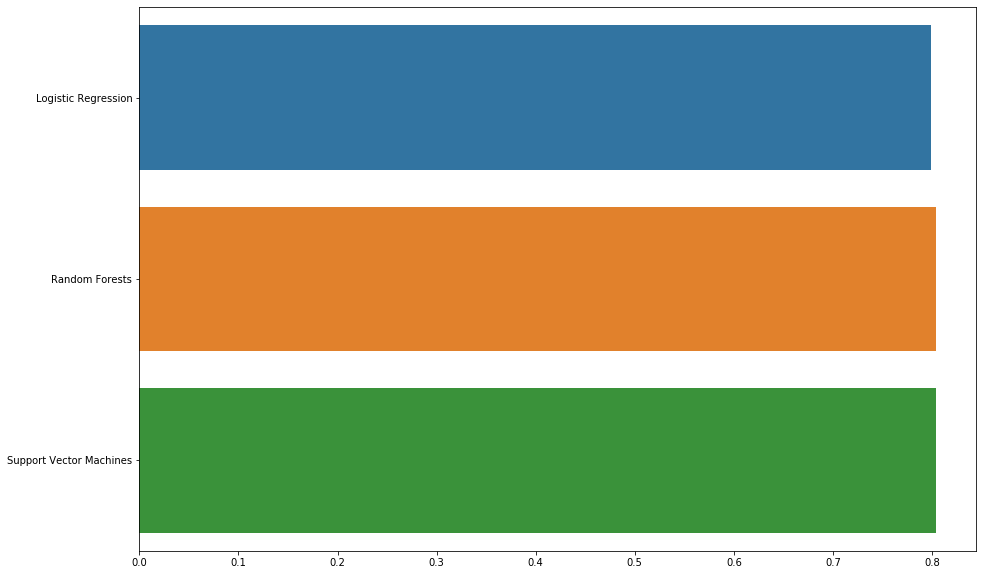

In [54]:
model = ['Logistic Regression', 'Random Forests', 'Support Vector Machines']
score =[acc_logisreg, acc_rf, acc_svc]
plt.figure(figsize = (15, 10))
sns.barplot(x = score, y = model)
plt.show()

In [60]:
print(y_pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
